# 인구수 관련 전처리
- total_population.csv 파일 생성

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install convertdate

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install cython

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install pystan

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# !pip install fbprophet

In [6]:
!pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install chart_studio

Defaulting to user installation because normal site-packages is not writeable


In [8]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [11]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import pandas as pd
import numpy as np
import chart_studio
import plotly.graph_objects as go
import plotly.express as px
import os 
import glob  
import sys

import plotly
import plotly.offline as pyo
import cufflinks as cf 
import plotly.express as px

import matplotlib.font_manager as fm  
from datetime import date
import datetime 
# import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib import style
import matplotlib as mpl  
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  
from wordcloud import WordCloud, STOPWORDS

plt.rc('font', family='NanumBarunGothic') 
cf.go_offline(connected=True)


In [13]:
data1 = pd.read_excel('../data/population/가구주의_성_연령별_추계가구전국.xlsx')
data2 = pd.read_excel('../data/population/연령_및_성별_인구__읍면동_2015.xlsx',header=1)
data3 = pd.read_excel('../data/population/총조사인구_총괄_시도_성_연령별.xlsx')


In [14]:
population2015= data2.loc[5:21][['연령별','총인구(명)']]
population2015 = population2015.loc[5:18]
del population2015['연령별']
population2015.columns=['2015']
population1970 = data3.loc[6:19][['연령별','1970','1975','1980','1985','1990','1995','2000','2005','2010']]
population2020 = data1.loc[2:18][['가구주의 연령별','2020','2025','2030','2035','2040','2045']]
new_data={'가구주의 연령별':'85세 이상','2020':population2020[13:].sum()[1],'2025':population2020[13:].sum()[2],'2030':population2020[13:].sum()[3],'2035':population2020[13:].sum()[4],'2040':population2020[13:].sum()[5],'2045':population2020[13:].sum()[6]}
population2020 = population2020.append(new_data, ignore_index=True)
population2020 = population2020.drop([13,14,15,16])
del population2020['가구주의 연령별']
population1970.reset_index(drop=True,inplace=True)
population2015.reset_index(drop=True,inplace=True)
population2020.reset_index(drop=True,inplace=True)
total_population = pd.concat([population1970,population2015,population2020],axis=1)


In [15]:
#2010년 인구구조
fig = go.Figure(go.Funnel(
    y = total_population['연령별'][::-1],
    x = total_population['2010'][::-1],
    textposition = "inside",
    textinfo = "percent total",
    opacity = 0.65, 
    
    marker = {
        "color": ["teal", "teal", "teal","teal","teal","teal","teal","teal","blue","blue","blue","blue","blue","blue"]}
    # "line": {"width": [4, 2, 2, 3, 1, 1], 
    #          "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    # connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}
    )
    )

fig.show()

In [16]:
# 2020년 인구구조
fig = go.Figure(go.Funnel(
    y = total_population['연령별'][::-1],
    x = total_population['2020'][::-1],
    textposition = "inside",
    textinfo = "percent total",
    opacity = 0.65, 
    marker = {
        "color": ["teal", "teal", "teal","teal","teal","teal","teal","teal","blue","blue","blue","blue","blue","blue"]}
    # "line": {"width": [4, 2, 2, 3, 1, 1], 
    #          "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    # connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}
    )
    )

fig.show()

In [17]:
#2030년 인구구조
fig = go.Figure(go.Funnel(
    y = total_population['연령별'][::-1],
    x = total_population['2030'][::-1],
    textposition = "inside",
    textinfo = "percent total",
    opacity = 0.65, 
    marker = {
        "color": ["teal", "teal", "teal","teal","teal","teal","teal","teal","blue","blue","blue","blue","blue","blue"]}
    # "line": {"width": [4, 2, 2, 3, 1, 1], 
    #          "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    # connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}
    )
    )

fig.show()

In [18]:
# 2040년 인구구조
fig = go.Figure(go.Funnel(
    y = total_population['연령별'][::-1],
    x = total_population['2040'][::-1],
    textposition = "inside",
    textinfo = "percent total",
    opacity = 0.65, 
    marker = {
        "color": ["teal", "teal", "teal","teal","teal","teal","teal","teal","blue","blue","blue","blue","blue","blue"]}
    # "line": {"width": [4, 2, 2, 3, 1, 1], 
    #          "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    # connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}
    )
    )

fig.show()

# 연령별 인터넷 이용률

In [19]:
internet_rate = pd.read_excel('../data/population/연령별_인터넷_이용률_20201013090912.xlsx')

In [20]:
internet_rate_use = internet_rate[['연령별(1)','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
internet_rate_use = internet_rate_use.rename(columns={'연령별(1)':'연령별'})
internet_rate_use = internet_rate_use[2:]
internet_rate_use = internet_rate_use.drop([8])
internet_rate_use.reset_index(drop=True,inplace=True)
internet_rate_use.drop(['2008','2009','2010','2011','2012','2013','2014'], axis='columns', inplace=True)
internet_rate_use_sen = internet_rate_use.loc[[4,5,6]]

In [21]:
import plotly.graph_objects as go

x = internet_rate_use_sen.columns[0:]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=internet_rate_use_sen.loc[4],
    name = internet_rate_use_sen['연령별'][4], # Style name/legend entry with html tags
    connectgaps=True, # override default to connect the gaps
    line_color='#00e1ff'
))
fig.add_trace(go.Scatter(
    x=x,
    y=internet_rate_use_sen.loc[5],
    name=internet_rate_use_sen['연령별'][5],
    line_color="#ff4400"
))
fig.add_trace(go.Scatter(
    x=x,
    y=internet_rate_use_sen.loc[6],
    name=internet_rate_use_sen['연령별'][6],
))

fig.show()

# 온라인 상품별 취급액

In [22]:
online_amount = pd.read_excel('../data/population/온라인쇼핑몰_취급상품범위별_상품군별거래액_20201013162333.xlsx')

In [23]:
online_amount = online_amount.rename(columns={'2020. 08 p)':'2020. 08'})
online_category_amount = online_amount[1:]
online_category_amount.reset_index(drop=True,inplace=True)
online_total_amount = online_amount[:1].T
online_total_amount
online_total_amount = online_total_amount['2017. 02':]
online_total_amount.columns = ['합계']
online_total_amount.reset_index(inplace=True)
online_total_amount=online_total_amount.rename(columns={'index':'날짜'})
online_total_amount['날짜'] = pd.to_datetime(online_total_amount['날짜'])
online_total_amount

날짜        합계
0 2017-02-01   7148849
1 2017-08-01   7859658
2 2018-02-01   8207296
3 2018-08-01   9270381
4 2019-02-01   9607307
5 2019-08-01  11278634
6 2020-02-01  11963252
7 2020-08-01  14383291

In [24]:
fig = px.bar(online_total_amount,x=online_total_amount['날짜'], y=online_total_amount.합계 ,title='온라인 상품별 취급액')
fig.show()

# 경제 인구 비율

In [25]:
economic_population_ratio= pd.read_excel('../data/population/연령별_경제활동인구_총괄_20201021125536.xlsx')

In [26]:
economic_population_ratio = economic_population_ratio.drop([0])
economic_population_ratio = economic_population_ratio.T['2010. 06':]
economic_population_ratio.columns = ['50-59세','60세 이상']
economic_population_ratio['50-59세'] = economic_population_ratio['50-59세'] * 1000
economic_population_ratio['60세 이상'] = economic_population_ratio['60세 이상'] * 1000

In [27]:
import plotly.graph_objects as go

years = economic_population_ratio.index

fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=economic_population_ratio['50-59세'],
                name='50-59세',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=years,
                y=economic_population_ratio['60세 이상'],
                name='60세 이상',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='50 대 이상의 경제활동 인구수',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='인구수',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

# 기간별 온라인 구매수/구매금액

In [28]:
#파일 Union  
all_data = pd.DataFrame()  

for f in glob.glob("../data/mco_data/*.xlsx"):   
    df = pd.read_excel(f)  
    all_data = all_data.append(df, ignore_index=True)
    print(all_data.shape)

#데이터갯수확인  
print(all_data.shape)

#파일저장  
all_data.to_csv("../data/MCO_full_data.csv", header= False, index=False)

(32661, 7)
(64466, 7)
(87931, 7)
(109972, 7)
(136106, 7)
(159870, 7)
(190297, 7)
(214187, 7)
(234103, 7)
(263707, 7)
(288390, 7)
(317634, 7)
(345677, 7)
(378211, 7)
(406370, 7)
(436344, 7)
(465375, 7)
(495832, 7)
(514934, 7)
(540948, 7)
(564360, 7)
(595899, 7)
(628704, 7)
(660649, 7)
(690680, 7)
(721760, 7)
(757175, 7)
(780207, 7)
(804825, 7)
(840088, 7)
(871243, 7)
(883758, 7)
(911519, 7)
(943787, 7)
(969785, 7)
(1003104, 7)
(1036326, 7)
(1054668, 7)
(1082444, 7)
(1118038, 7)
(1157189, 7)
(1177154, 7)
(1204805, 7)
(1226668, 7)
(1254496, 7)
(1288004, 7)
(1314048, 7)
(1348318, 7)
(1375520, 7)
(1397300, 7)
(1428016, 7)
(1462021, 7)
(1494182, 7)
(1517429, 7)
(1555337, 7)
(1588172, 7)
(1624578, 7)
(1650380, 7)
(1676878, 7)
(1707267, 7)
(1741514, 7)
(1768025, 7)
(1799458, 7)
(1837833, 7)
(1837833, 7)


In [29]:
raw_data = pd.read_csv('../data/MCO_full_data.csv', sep = ",")

In [30]:
d1 = raw_data
d1.columns = ['구매날짜','카테고리명','고객성별','고객나이','OS유형','구매금액','구매수']
d2 = d1

In [31]:
d2['구매날짜'] = pd.to_datetime(d2['구매날짜'].astype(str), format='%Y %m %d')
index_minus = d2[(d2["고객나이"]<0)| (d2["고객나이"] >100) ].index


In [32]:
d3 = d2.drop(index_minus)

In [33]:
def topN(data, target_age, N):
    table_target_age = data[data["고객나이"] == target_age]
    increase_topN = table_target_age.sort_values(by = "구매금액_변화율", ascending=False).head(N)
    increase_topN_rate= increase_topN["구매금액_변화율"]
    # print(increase_topN_rate)
    
    # print("변화율 증가 TOP {} :".format(N), increase_topN_rate.index)
    # print("")
    # print("")

    decrease_topN = table_target_age.sort_values(by = "구매금액_변화율", ascending=True).head(N)
    decrease_topN_rate = decrease_topN["구매금액_변화율"]
    # print(decrease_topN_rate) 

    
    # print("변화율 감소 TOP {} :".format(N), decrease_topN_rate.index)

    total_topN = table_target_age.sort_values(by = "구매금액_변화율", ascending=False)
    total_topN_rate = total_topN["구매금액_변화율"]


    # 전역변수 데이터프레임 생성 
    globals()["increase_top{}_{}".format(N, target_age)] = pd.DataFrame(increase_topN_rate)
    globals()["decrease_top{}_{}".format(N, target_age)] = pd.DataFrame(decrease_topN_rate)
    globals()["total_top{}_{}".format(N, target_age)] = pd.DataFrame(total_topN_rate)
    globals()["total_topN{}_{}".format(N, target_age)] = pd.DataFrame(total_topN)

    # return increase_topN_rate , decrease_topN_rate
    


In [34]:
def processing(d2019,d2020,name):
    d2019_group_SUM = d2019.groupby(by=['카테고리명', '고객나이' ], as_index=False).sum()
    d2020_group_SUM = d2020.groupby(by=['카테고리명', '고객나이' ], as_index=False).sum()

    d2019_group_MEAN = d2019.groupby(by=['카테고리명', '고객나이' ], as_index=False).mean()
    d2020_group_MEAN = d2020.groupby(by=['카테고리명', '고객나이' ], as_index=False).mean()
    d2019_group_MEAN.set_index('카테고리명','고객나이' , inplace=True)
    d2020_group_MEAN.set_index('카테고리명','고객나이' ,inplace=True)

    merged_data_MEAN = d2019_group_MEAN.merge(d2020_group_MEAN, on=['카테고리명','고객나이'], how='right')

    merged_data_MEAN = merged_data_MEAN.fillna(0)

    merged_data_MEAN.columns = ["고객나이", "구매금액_19년", "구매수_19년", "구매금액_20년","구매수_20년"]   # 컬럼 이름 바꾸기 

    merged_data_MEAN['구매금액_변화'] = (merged_data_MEAN['구매금액_20년']-merged_data_MEAN['구매금액_19년'])
    merged_data_MEAN['구매수_변화'] = (merged_data_MEAN['구매수_20년']-merged_data_MEAN['구매수_19년'])

    merged_data_MEAN['구매금액_변화율'] = (merged_data_MEAN['구매금액_20년']-merged_data_MEAN['구매금액_19년'])/merged_data_MEAN['구매금액_19년']
    merged_data_MEAN['구매수_변화율'] = (merged_data_MEAN['구매수_20년']-merged_data_MEAN['구매수_19년'])/merged_data_MEAN['구매수_19년']

    merged_MEAN_table = merged_data_MEAN

    for i in range(0,110,10):
        topN(merged_MEAN_table, i, 20)

    total_top20_10.columns=[10]
    total_top20_20.columns=[20]
    total_top20_30.columns=[30]
    total_top20_40.columns=[40]
    total_top20_50.columns=[50]
    total_top20_60.columns=[60]
    total_top20_70.columns=[70]
    total_top20_80.columns=[80]
    total_top20_90.columns=[90]

    covid = pd.concat([total_top20_10,total_top20_20,total_top20_30,total_top20_40,total_top20_50,total_top20_60,total_top20_70,total_top20_80,total_top20_90],axis=1)

    purchase_amount = pd.DataFrame({
        '구매금액 19년':[total_topN20_10['구매금액_19년'].sum(),total_topN20_20['구매금액_19년'].sum(),total_topN20_30['구매금액_19년'].sum(),total_topN20_40['구매금액_19년'].sum(),total_topN20_50['구매금액_19년'].sum(),total_topN20_60['구매금액_19년'].sum(),total_topN20_70['구매금액_19년'].sum(),total_topN20_80['구매금액_19년'].sum(),total_topN20_90['구매금액_19년'].sum()],
        '구매금액_20년':[total_topN20_10['구매금액_20년'].sum(),total_topN20_20['구매금액_20년'].sum(),total_topN20_30['구매금액_20년'].sum(),total_topN20_40['구매금액_20년'].sum(),total_topN20_50['구매금액_20년'].sum(),total_topN20_60['구매금액_20년'].sum(),total_topN20_70['구매금액_20년'].sum(),total_topN20_80['구매금액_20년'].sum(),total_topN20_90['구매금액_20년'].sum()],
        '구매금액__변화':[total_topN20_10['구매금액_변화'].sum(),total_topN20_20['구매금액_변화'].sum(),total_topN20_30['구매금액_변화'].sum(),total_topN20_40['구매금액_변화'].sum(),total_topN20_50['구매금액_변화'].sum(),total_topN20_60['구매금액_변화'].sum(),total_topN20_70['구매금액_변화'].sum(),total_topN20_80['구매금액_변화'].sum(),total_topN20_90['구매금액_변화'].sum()]
    })

    purchase_amount.index=[10,20,30,40,50,60,70,80,90]

    purchases_number = pd.DataFrame({
        '구매수_19년':[total_topN20_10['구매수_19년'].sum(),total_topN20_20['구매수_19년'].sum(),total_topN20_30['구매수_19년'].sum(),total_topN20_40['구매수_19년'].sum(),total_topN20_50['구매수_19년'].sum(),total_topN20_60['구매수_19년'].sum(),total_topN20_70['구매수_19년'].sum(),total_topN20_80['구매수_19년'].sum(),total_topN20_90['구매수_19년'].sum()],
        '구매수_20년':[total_topN20_10['구매수_20년'].sum(),total_topN20_20['구매수_20년'].sum(),total_topN20_30['구매수_20년'].sum(),total_topN20_40['구매수_20년'].sum(),total_topN20_50['구매수_20년'].sum(),total_topN20_60['구매수_20년'].sum(),total_topN20_70['구매수_20년'].sum(),total_topN20_80['구매수_20년'].sum(),total_topN20_90['구매수_20년'].sum()],
        '구매수_변화':[total_topN20_10['구매수_변화'].sum(),total_topN20_20['구매수_변화'].sum(),total_topN20_30['구매수_변화'].sum(),total_topN20_40['구매수_변화'].sum(),total_topN20_50['구매수_변화'].sum(),total_topN20_60['구매수_변화'].sum(),total_topN20_70['구매수_변화'].sum(),total_topN20_80['구매수_변화'].sum(),total_topN20_90['구매수_변화'].sum()],
        '구매수_변화율':[total_topN20_10['구매수_변화율'].sum(),total_topN20_20['구매수_변화율'].sum(),total_topN20_30['구매수_변화율'].sum(),total_topN20_40['구매수_변화율'].sum(),total_topN20_50['구매수_변화율'].sum(),total_topN20_60['구매수_변화율'].sum(),total_topN20_70['구매수_변화율'].sum(),total_topN20_80['구매수_변화율'].sum(),total_topN20_90['구매수_변화율'].sum()]
    })

    purchases_number.index=[10,20,30,40,50,60,70,80,90]


In [35]:
# 국내 코로나 기간
domestic_corona2019 = d3[d3["구매날짜"]<=  "2019-06-30"]
domestic_corona2020 = d3[d3["구매날짜"]>=  "2020-01-01"]

# 강도높은 사회적 거리두기 기간
Intense2019 = d3[d3["구매날짜"]<=  "2019-05-05"]
Intense2019 = Intense2019[Intense2019["구매날짜"]>  "2019-03-02"]

Intense2020 = d3[d3["구매날짜"]<=  "2020-05-05"]
Intense2020 = Intense2020[Intense2020["구매날짜"]>  "2020-03-02"]

#생활속 사회적 거리두기 기간
life2019 = d3[d3["구매날짜"]<=  "2019-06-30"]
life2019 = life2019[life2019["구매날짜"]>  "2019-05-06"]

life2020 = d3[d3["구매날짜"]<=  "2020-06-30"]
life2020 = life2020[life2020["구매날짜"]>  "2020-05-06"]

In [36]:
processing(domestic_corona2019,domestic_corona2020,'domestic')
processing(Intense2019,Intense2020,'intense')
processing(life2019,life2020,'life')

# 엠코데이터 

In [37]:
mco_raw = pd.read_csv('../data//MCO_full_data.csv')
mco1 = mco_raw

In [38]:
mco1.columns = ['구매날짜','카테고리명','고객성별','고객나이','OS유형','구매금액','구매수']
mco2=mco1
mco2['구매날짜'] = pd.to_datetime(mco2['구매날짜'].astype(str), format='%Y %m %d')
mco2['구매월'] = mco2['구매날짜'].dt.strftime('%Y-%m')
mco2 = mco2.reindex(columns=['구매날짜','구매월','카테고리명','고객성별','고객나이','OS유형','구매금액','구매수'])
mco3 = mco2.drop(mco2[(mco2["고객나이"]< 50)| (mco2["고객나이"] >= 100) ].index)
## 70세 , 80세, 90세 --> 60세 이상으로 처리 

mco3.loc[mco3["고객나이"] == 70,"고객나이"] = 60
mco3.loc[mco3["고객나이"] == 80,"고객나이"] = 60
mco3.loc[mco3["고객나이"] == 90,"고객나이"] = 60

mco_alltime = mco3

In [39]:
# 2019년 전체 
mco_2019 =  mco_alltime[(mco_alltime['구매날짜'] >= "2019-01-01")  &  (mco_alltime['구매날짜'] <= "2019-12-31")]
mco_2019.reset_index(inplace=True, drop=True)

# 2019년 상반기 
mco_2019_1half =  mco_alltime[(mco_alltime['구매날짜'] >= "2019-01-01")  &  (mco_alltime['구매날짜'] <= "2019-06-30")]
mco_2019_1half.reset_index(inplace=True, drop=True)

# 2020년 전체 
mco_2020 =  mco_alltime[(mco_alltime['구매날짜'] >= "2020-01-01")  &  (mco_alltime['구매날짜'] <= "2020-06-30")]
mco_2020.reset_index(inplace=True, drop=True)


# 국내 코로나 전체
mco_corona_before = mco_alltime[(mco_alltime['구매날짜'] >= "2019-01-20")  &  (mco_alltime['구매날짜'] <= "2019-05-05")]
mco_corona_before.reset_index(inplace=True, drop=True)

mco_corona_after = mco_alltime[(mco_alltime['구매날짜'] >= "2020-01-20") &   (mco_alltime['구매날짜'] <= "2020-05-05") ]
mco_corona_after.reset_index(inplace=True, drop=True)

# 코로나 초창기 
mco_early_before = mco_alltime[(mco_alltime['구매날짜'] >= "2019-01-20")  &  (mco_alltime['구매날짜'] <= "2019-03-20")]
mco_early_before.reset_index(inplace=True, drop=True)

mco_early_after = mco_alltime[(mco_alltime['구매날짜'] >= "2020-01-20")  &  (mco_alltime['구매날짜'] <= "2020-03-20")]
mco_early_after.reset_index(inplace=True, drop=True)


# 강화된 사회적 거리두기  
mco_high_before = mco_alltime[(mco_alltime['구매날짜'] >= "2019-03-22")  &  (mco_alltime['구매날짜'] <= "2019-05-05")]
mco_high_before.reset_index(inplace=True, drop=True)

mco_high_after = mco_alltime[(mco_alltime['구매날짜'] >= "2020-03-22")  &  (mco_alltime['구매날짜'] <= "2020-05-05")]
mco_high_after.reset_index(inplace=True, drop=True)


In [40]:
def groupby_category_age(data):
    
    # 합계로 집계
    group_SUM = data.groupby(by=['카테고리명', '고객나이'], as_index=False).sum()
    group_SUM.set_index('카테고리명','고객나이' , inplace=True)
    
    # 평균으로 집계 
    group_MEAN = data.groupby(by=['카테고리명', '고객나이'], as_index=False).mean()
    group_MEAN.set_index('카테고리명','고객나이' , inplace=True)
    
    return group_SUM, group_MEAN 

In [41]:
mco_2019_SUM, mco_2019_MEAN = groupby_category_age(mco_2019)
mco_2020_SUM, mco_2020_MEAN = groupby_category_age(mco_2020)

mco_2019_1half_SUM, mco_2019_1half_MEAN = groupby_category_age(mco_2019_1half)

mco_corona_before_SUM, mco_corona_before_MEAN  = groupby_category_age(mco_corona_before)
mco_corona_after_SUM, mco_corona_after_MEAN    = groupby_category_age(mco_corona_after)

mco_high_before_SUM,mco_high_before_MEAN       = groupby_category_age(mco_high_before)
mco_high_after_SUM, mco_high_after_MEAN        = groupby_category_age(mco_high_after)

mco_early_before_SUM,mco_early_before_MEAN       = groupby_category_age(mco_early_before)
mco_early_after_SUM, mco_early_after_MEAN        = groupby_category_age(mco_early_after)

In [42]:
def merge_before_after(before_data, after_data):
    merged_data = before_data.merge(after_data, on=['카테고리명','고객나이'], how='right')
    
    # 결측치 0 처리 |
    merged_data = merged_data.fillna(0)
    
    # 컬럼 이름 변경 
    merged_data.columns = ["고객나이", "구매금액_19년", "구매수_19년", "구매금액_20년","구매수_20년"]    
 
    # 구매금액_변화량, 구매수_변화량, 구매금액_변화율, 구매수_변화율 컬럼 생성
    merged_data['구매금액_변화량'] = (merged_data['구매금액_20년']- merged_data['구매금액_19년'])
    merged_data['구매수_변화량']   = (merged_data['구매수_20년']  - merged_data['구매수_19년'])
    merged_data['구매금액_변화율'] = (merged_data['구매금액_20년']- merged_data['구매금액_19년'])/merged_data['구매금액_19년']
    merged_data['구매수_변화율']   = (merged_data['구매수_20년']  - merged_data['구매수_19년'])/merged_data['구매수_19년']
    
    return merged_data

# inf 값 어떻게 처리할 것인가? 

In [43]:
# 19, 20 상반기 비교 
mco_1920_1half_merge_SUM     = merge_before_after(mco_2019_1half_SUM,     mco_2020_SUM)
mco_1920_1half_merge_MEAN    = merge_before_after(mco_2019_1half_MEAN,    mco_2020_MEAN)

# 코로나 전후 비교 
mco_corona_merge_SUM  = merge_before_after(mco_corona_before_SUM,  mco_corona_after_SUM)
mco_corona_merge_MEAN = merge_before_after(mco_corona_before_MEAN, mco_corona_after_MEAN)

# 코로나 초기 & 사회적 거리두기 비교 
mco_early_high_merge_SUM  = merge_before_after(mco_early_after_SUM, mco_high_after_SUM) 
mco_early_high_merge_SUM.rename(columns = {'구매금액_19년' : '구매금액_초기',
                                           '구매수_19년'   : '구매수_초기',
                                           '구매금액_20년' : '구매금액_거리두기',
                                           '구매수_20년'   : '구매수_거리두기'} , inplace = True)

mco_early_high_merge_MEAN  = merge_before_after(mco_early_after_MEAN, mco_high_after_MEAN) 
mco_early_high_merge_MEAN.rename(columns = {'구매금액_19년' : '구매금액_초기(평균)',
                                           '구매수_19년'   : '구매수_초기(평균)',
                                           '구매금액_20년' : '구매금액_거리두기(평균)',
                                           '구매수_20년'   : '구매수_거리두기(평균)'} , inplace = True)


# 19, 20 코로나 초창기 비교 
mco_high_merge_SUM    = merge_before_after(mco_high_before_SUM,    mco_high_after_SUM)
mco_high_merge_MEAN   = merge_before_after(mco_high_before_MEAN,   mco_high_after_MEAN)

# 19, 20 사회적거리두기 비교 
mco_early_merge_SUM    = merge_before_after(mco_early_before_SUM,    mco_early_after_SUM)
mco_early_merge_MEAN   = merge_before_after(mco_early_before_MEAN,   mco_early_after_MEAN)

In [44]:
merged_table_group  = [mco_corona_merge_SUM, mco_early_high_merge_SUM, mco_high_merge_SUM,mco_early_merge_SUM ]

In [45]:
#전체 업종 소비 건수 파악
sam_df_count  = mco_alltime.groupby('카테고리명')[['구매수']].agg(sum).sort_values(by = "구매수", ascending=False).head(20)
sam_df_amount = mco_alltime.groupby('카테고리명')[['구매금액']].agg(sum).sort_values(by = "구매금액", ascending=False).head(20)


#연령별 소비 건수 파악 
sam_df_age = mco_alltime.groupby('고객나이')[['구매수']].agg(sum)
sam_df_age_amount = mco_alltime.groupby('고객나이')[['구매금액']].agg(sum)

sam_df_age.reset_index(inplace=True)
sam_df_age_amount.reset_index(inplace=True)

In [46]:
display(sam_df_count.iplot(kind='bar' ,   title = '온라인 구매수   TOP20 카테고리' ))
display(sam_df_amount.iplot(kind = 'bar', title = '온라인 구매금액 TOP20 카테고리'))

None

None

In [47]:
# 2019년 (1월1일 ~12월 31일)
mco_2019_50 = mco_2019[mco_2019['고객나이']==50]
mco_2019_60 = mco_2019[mco_2019['고객나이']==60]

mco_2019_50_count  = mco_2019_50.groupby('카테고리명')[['구매수']].agg(sum).sort_values(by = "구매수", ascending=False).head(14)
mco_2019_60_count  = mco_2019_60.groupby('카테고리명')[['구매수']].agg(sum).sort_values(by = "구매수", ascending=False).head(14)


In [48]:
# 2020년 (1월1일 ~ 06월 30일)
mco_2020_50 = mco_2020[mco_2020['고객나이']==50]
mco_2020_60 = mco_2020[mco_2020['고객나이']==60]

mco_2020_50_count  = mco_2020_50.groupby('카테고리명')[['구매수']].agg(sum).sort_values(by = "구매수", ascending=False).head(14)
mco_2020_60_count  = mco_2020_60.groupby('카테고리명')[['구매수']].agg(sum).sort_values(by = "구매수", ascending=False).head(14)


In [49]:
# 사회적 거리두기 전 ( )
mco_early_after_50 = mco_early_after[mco_early_after['고객나이']==50]
mco_early_after_60 = mco_early_after[mco_early_after['고객나이']==60]

mco_early_after_50_count  = mco_early_after_50.groupby('카테고리명')[['구매수']].agg(sum).sort_values(by = "구매수", ascending=False).head(14)
mco_early_after_60_count  = mco_early_after_60.groupby('카테고리명')[['구매수']].agg(sum).sort_values(by = "구매수", ascending=False).head(14)


# 사회적 거리두기 후 ( )
mco_high_after_50 = mco_high_after[mco_high_after['고객나이']==50]
mco_high_after_60 = mco_high_after[mco_high_after['고객나이']==60]

mco_high_after_50_count  = mco_high_after_50.groupby('카테고리명')[['구매수']].agg(sum).sort_values(by = "구매수", ascending=False).head(14)
mco_high_after_60_count  = mco_high_after_60.groupby('카테고리명')[['구매수']].agg(sum).sort_values(by = "구매수", ascending=False).head(14)




In [50]:
display(mco_early_after_50_count.iplot(kind='bar' ,   title = '50대 거리두기 전 잘팔린 카테고리(구매수)' ))
display(mco_early_after_60_count.iplot(kind='bar' , color = 'blue'  , title = '60대 거리두기 전 잘팔린 카테고리(구매수)' ))

display(mco_high_after_50_count.iplot(kind='bar' ,   title = '50대 거리두기 후 잘팔린 카테고리(구매수)' ))
display(mco_high_after_60_count.iplot(kind='bar' , color = 'blue'  , title = '60대 거리두기 후 잘팔린 카테고리(구매수)' ))

None

None

None

None

In [51]:
display(mco_2019_50_count.iplot(kind='bar' ,   title = '50대 2019년 잘팔린 카테고리' ))
display(mco_2019_60_count.iplot(kind='bar' , color = 'blue'  , title = '60대 2019년 잘팔린 카테고리' ))

None

None

In [52]:
display(mco_2020_50_count.iplot(kind='bar' ,   title = '50대 2020년 잘팔린 카테고리' ))
display(mco_2020_60_count.iplot(kind='bar' , color = 'blue'  , title = '60대 2020년 잘팔린 카테고리' ))

None

None

In [53]:
def spending_by_age_ratio_amount(before_data, after_data, graph_title):
    
    
    # 특정시기 이전
    before_age_num = before_data.groupby('고객나이')[['구매수']].agg(sum).reset_index()
    before_age_amount = before_data.groupby('고객나이')[['구매금액']].agg(sum).reset_index()

    # 특정시기 이후
    after_age_num = after_data.groupby('고객나이')[['구매수']].agg(sum).reset_index()
    after_age_amount = after_data.groupby('고객나이')[['구매금액']].agg(sum).reset_index()

    # 누적 구매수 파악
    bar_num = pd.merge(before_age_num, after_age_num, on='고객나이')
    bar_num = bar_num.rename({'구매수_x':'Before_corona', '구매수_y':'After_corona'}, axis='columns')
    bar_num = bar_num.set_index('고객나이').T

    # 누적 구매금액 파악
    bar_amount = pd.merge(before_age_amount, after_age_amount, on='고객나이')
    bar_amount = bar_amount.rename({'구매금액_x':'Before_corona', '구매금액_y':'After_corona'}, axis='columns')
    bar_amount = bar_amount.set_index('고객나이').T


    # 증감율 / 증감액 컬럼 추가
    per_num = bar_num.T
    per_num['증감률']   = per_num.apply(lambda f : ((f.After_corona - f.Before_corona) / f.Before_corona)*100,axis=1)
    per_num['증감횟수'] = per_num.apply(lambda f : (f.After_corona - f.Before_corona), axis=1)

    
    per_amount = bar_amount.T
    per_amount['증감률'] = per_amount.apply(lambda f : ((f.After_corona - f.Before_corona) / f.Before_corona)*100, axis=1)
    per_amount['증감액'] = per_amount.apply(lambda f : (f.After_corona - f.Before_corona), axis=1)

                                   
#     결과출력 
    display(per_num['증감률'].iplot(kind='bar' , color=["blue", "orange"], title = graph_title + ' 전후 소비건수 증감율'))
    display(per_amount['증감률'].iplot(kind='bar' ,   title = graph_title + ' 전후 소비금액 증감율'))
    
    display(per_num['증감횟수'].iplot(kind='bar' ,      title = graph_title + ' 전후 소비건수 증감횟수'))
    display(per_amount['증감액'].iplot(kind='bar' ,   title = graph_title +   ' 전후 소비금액 증감액'))

In [54]:
spending_by_age_ratio_amount(mco_corona_before, mco_corona_after, "코로나 ")
spending_by_age_ratio_amount(mco_early_after,   mco_high_after,   "사회적 거리두기 (20년) ")
spending_by_age_ratio_amount(mco_early_before, mco_early_after,   "코로나 초창기 기간 (19년도 vs 20년도) ")
spending_by_age_ratio_amount(mco_early_before, mco_early_after,   "거리두기 기간 (19년도 vs 20년도)")
spending_by_age_ratio_amount(mco_early_after,   mco_high_after,   "상반기 비교 (19년도 vs 20년) ")

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

In [55]:
def spending_num_by_time(data):
    p1 = pd.pivot_table(data,                
                     index = '구매월',    
                     columns = '고객나이',   
                     values = '구매수',     
                     aggfunc = 'sum')  
    p1.iplot(kind='bar',barmode='stack', title = '5060 2019년 구매건수 합')    
def spending_amount_by_time(data):
    p1 = pd.pivot_table(data,                
                     index = '구매월',    
                     columns = '고객나이',   
                     values = '구매금액',     
                     aggfunc = 'sum')  
    p1.iplot(kind='bar' ,barmode='stack', title = '5060 2019년 구매액수 합')
spending_num_by_time(mco_2019)
spending_amount_by_time(mco_2019)

In [56]:
spending_num_by_time(mco_corona_after)
spending_amount_by_time(mco_corona_after)

In [57]:
def topN_category_ratio(data, target_age, N):
    
    time= 0
    # 나이 선택 
    table_target_age = data[data["고객나이"] == target_age]
    
    # 증가한 구매금액 변화율 
    increase_topN = table_target_age.sort_values(by = "구매금액_변화율", ascending=False).head(N)
    increase_topN_rate= increase_topN["구매금액_변화율"]
    
    # 증가한 구매수 변화율 
    increase_topN_num = table_target_age.sort_values(by = "구매수_변화율", ascending=False).head(N)
    increase_topN_num_rate= increase_topN_num["구매수_변화율"]
    
    
    # 감소한 구매금액 변화율 
    decrease_topN = table_target_age.sort_values(by = "구매금액_변화율", ascending=True).head(N)
    decrease_topN_rate = decrease_topN["구매금액_변화율"]
    
    # 감소한 구매수 변화율 
    decrease_topN_num = table_target_age.sort_values(by = "구매수_변화율", ascending=True).head(N)
    decrease_topN_num_rate = decrease_topN_num["구매수_변화율"]
        

    
    # 전역변수 데이터프레임 생성 
    globals()["ratio_increase_top{}_{}".format(N, target_age)] = pd.DataFrame(increase_topN_rate)
    globals()["ratio_decrease_top{}_{}".format(N, target_age)] = pd.DataFrame(decrease_topN_rate)
    globals()["ratio_increase_num_top{}_{}".format(N, target_age)] = pd.DataFrame(increase_topN_num_rate)
    globals()["ratio_decrease_num_top{}_{}".format(N, target_age)] = pd.DataFrame(decrease_topN_num_rate)

In [58]:
def topN_category_amount(data, target_age, N):
    # 나이 선택 
    table_target_age = data[data["고객나이"] == target_age]
    
    # 증가한 구매금액 변화량 
    increase_topN = table_target_age.sort_values(by = "구매금액_변화량", ascending=False).head(N)
    increase_topN_amount= increase_topN["구매금액_변화량"]
    
    # 증가한 구매수 변화량 
    increase_topN_num = table_target_age.sort_values(by = "구매수_변화량", ascending=False).head(N)
    increase_topN_num_amount= increase_topN_num["구매수_변화량"]


    # 감소한 구매금액 변화량 
    decrease_topN = table_target_age.sort_values(by = "구매금액_변화량", ascending=True).head(N)
    decrease_topN_amount = decrease_topN["구매금액_변화량"]

    # 감소한 구매수 변화량 
    decrease_topN_num = table_target_age.sort_values(by = "구매수_변화량", ascending=True).head(N)
    decrease_topN_num_amount = decrease_topN_num["구매수_변화량"]

    
    # 전역변수 데이터프레임 생성 
    globals()["amount_increase_top{}_{}".format(N, target_age)] = pd.DataFrame(increase_topN_amount)
    globals()["amount_decrease_top{}_{}".format(N, target_age)] = pd.DataFrame(decrease_topN_amount)
    globals()["amount_increase_num_top{}_{}".format(N, target_age)] = pd.DataFrame(increase_topN_num_amount)
    globals()["amount_decrease_num_top{}_{}".format(N, target_age)] = pd.DataFrame(decrease_topN_num_amount)

In [59]:
merged_table_group  = [mco_corona_merge_SUM, mco_early_high_merge_MEAN , mco_high_merge_SUM,mco_early_merge_SUM , mco_1920_1half_merge_SUM ]

In [60]:
for i in range(len(merged_table_group)):
    print("{}번째 데이터".format(i))
    merged_table = merged_table_group[i]
    
    for age in range(50,70,10):
        topN_category_ratio(merged_table,age,14)
        topN_category_amount(merged_table,age,14)
        
    display(ratio_increase_top14_50.iplot(kind='bar' ,        title = '50대 온라인 구매금액 증가율   TOP14 카테고리' ))
    display(ratio_increase_top14_60.iplot(kind='bar' ,        title = '60대 이상 온라인 구매금액 증가율   TOP14 카테고리' , color = 'blue'))

    display(ratio_increase_num_top14_50.iplot(kind='bar' ,    title = '50대 온라인 구매수 증가율   TOP14 카테고리' ))
    display(ratio_increase_num_top14_60.iplot(kind='bar' ,    title = '60대 이상 온라인 구매수 증가율   TOP14 카테고리' , color = 'blue'))

    display(amount_increase_top14_50.iplot(kind='bar' ,       title = '50대 온라인 구매금액 증가량   TOP14 카테고리' ))
    display(amount_increase_top14_60.iplot(kind='bar' ,       title = '60대 이상 온라인 구매금액 증가량   TOP14 카테고리', color = 'blue' ))

    display(amount_increase_num_top14_50.iplot(kind='bar' ,   title = '50대 온라인 구매수 증가량   TOP14 카테고리' ))
    display(amount_increase_num_top14_60.iplot(kind='bar' ,   title = '60대 이상 온라인 구매수 증가량   TOP14 카테고리', color = 'blue' ))



0번째 데이터


None

None

None

None

None

None

None

None

1번째 데이터


None

None

None

None

None

None

None

None

2번째 데이터


None

None

None

None

None

None

None

None

3번째 데이터


None

None

None

None

None

None

None

None

4번째 데이터


None

None

None

None

None

None

None

None

In [61]:
mco_2019_yoill = mco_2019
mco_2019_yoill['구매요일'] = mco_2019_yoill['구매날짜'].dt.weekday

In [62]:
# 2019_yoill년 (1월1일 ~12월 31일)
mco_2019_yoill_50 = mco_2019_yoill[mco_2019_yoill['고객나이']==50]
mco_2019_yoill_60 = mco_2019_yoill[mco_2019_yoill['고객나이']==60]

mco_2019_yoill_50_count  = mco_2019_yoill_50.groupby('카테고리명')[['구매수']].agg(sum).sort_values(by = "구매수", ascending=False).head(14)
mco_2019_yoill_60_count  = mco_2019_yoill_60.groupby('카테고리명')[['구매수']].agg(sum).sort_values(by = "구매수", ascending=False).head(14)


In [63]:
mco_2019_yoill_50_count.iplot(kind='bar' ,   title = '50대 2019년 잘팔린 요일 (2019년)' )
mco_2019_yoill_60_count.iplot(kind = 'bar', title = '60대 2019년 잘팔린 요일 (2019년)')

In [64]:
# 코로나 전후 

processed_amount_corona = mco_corona_merge_SUM[mco_corona_merge_SUM.index=='가공식품'][['고객나이', '구매금액_변화량']]
health_amount_corona    = mco_corona_merge_SUM[mco_corona_merge_SUM.index=='건강식품'][['고객나이', '구매금액_변화량']]
fresh_amount_corona     = mco_corona_merge_SUM[mco_corona_merge_SUM.index=='농축수산물'][['고객나이', '구매금액_변화량']]

# 강화된 사회적 거리두기 전후 
processed_amount_early_high = mco_early_high_merge_SUM[mco_early_high_merge_SUM.index=='가공식품'][['고객나이', '구매금액_변화량']]
health_amount_early_high    = mco_early_high_merge_SUM[mco_early_high_merge_SUM.index=='건강식품'][['고객나이', '구매금액_변화량']]
fresh_amount_early_high     = mco_early_high_merge_SUM[mco_early_high_merge_SUM.index=='농축수산물'][['고객나이', '구매금액_변화량']]

# 코로나 초창기 기간 (19 vs 20) 
processed_amount_early = mco_early_merge_SUM[mco_early_merge_SUM.index=='가공식품'][['고객나이', '구매금액_변화량']]
health_amount_early    = mco_early_merge_SUM[mco_early_merge_SUM.index=='건강식품'][['고객나이', '구매금액_변화량']]
fresh_amount_early     = mco_early_merge_SUM[mco_early_merge_SUM.index=='농축수산물'][['고객나이', '구매금액_변화량']]

# 사회적 거리두기 기간 (19 vs 20) 
processed_amount_high = mco_high_merge_SUM[mco_high_merge_SUM.index=='가공식품'][['고객나이', '구매금액_변화량']]
health_amount_high    = mco_high_merge_SUM[mco_high_merge_SUM.index=='건강식품'][['고객나이', '구매금액_변화량']]
fresh_amount_high     = mco_high_merge_SUM[mco_high_merge_SUM.index=='농축수산물'][['고객나이', '구매금액_변화량']]


In [65]:
# 코로나 전후 
food_amount_corona = processed_amount_corona.merge(health_amount_corona, on= ['고객나이'])
food_amount_corona = food_amount_corona.merge(fresh_amount_corona, on = ['고객나이'])
food_amount_corona.set_index(food_amount_corona['고객나이'], inplace=True)
food_amount_corona.drop(['고객나이'], axis =1, inplace = True)
food_amount_corona.columns = ['가공식품','건강식품','농축수산물'] 

# 강화된 사회적 거리두기 전후 (2020)
food_amount_early_high = processed_amount_early_high.merge(health_amount_early_high, on= ['고객나이'])
food_amount_early_high = food_amount_early_high.merge(fresh_amount_early_high, on = ['고객나이'])
food_amount_early_high.set_index(food_amount_early_high['고객나이'], inplace=True)
food_amount_early_high.drop(['고객나이'], axis =1, inplace = True)
food_amount_early_high.columns = ['가공식품','건강식품','농축수산물'] 

# 코로나 초창기 기간 (19 vs 20) 
food_amount_early = processed_amount_early.merge(health_amount_early, on= ['고객나이'])
food_amount_early = food_amount_early.merge(fresh_amount_early, on = ['고객나이'])
food_amount_early.set_index(food_amount_early['고객나이'], inplace=True)
food_amount_early.drop(['고객나이'], axis =1, inplace = True)
food_amount_early.columns = ['가공식품','건강식품','농축수산물'] 

# 사회적 거리두기 기간 (19 vs 20) 
food_amount_high = processed_amount_high.merge(health_amount_high, on= ['고객나이'])
food_amount_high = food_amount_high.merge(fresh_amount_high, on = ['고객나이'])
food_amount_high.set_index(food_amount_high['고객나이'], inplace=True)
food_amount_high.drop(['고객나이'], axis =1, inplace = True)
food_amount_high.columns = ['가공식품','건강식품','농축수산물'] 


In [66]:
food_amount_corona.iplot(kind='area', fill=True,  title = '연령대별 코로나 전후 식품류 결제금액 증가량' )
food_amount_early_high.iplot(kind='area', fill=True,  title = '연령대별 거리두기 전후 (20) 식품류 결제금액 증가량' )
food_amount_early.iplot(kind='area', fill=True,  title = '연령대별 코로나 초창기 기간(19 vs 20) 식품류 결제금액 증가량' )
food_amount_high.iplot(kind='area', fill=True,  title = '연령대별 거리두기 기간 (19 vs 20)  식품류 결제금액 증가량' )



In [67]:
# 코로나 전후 
processed_ratio_corona = mco_corona_merge_SUM[mco_corona_merge_SUM.index=='가공식품'][['고객나이', '구매금액_변화율']]
health_ratio_corona    = mco_corona_merge_SUM[mco_corona_merge_SUM.index=='건강식품'][['고객나이', '구매금액_변화율']]
fresh_ratio_corona     = mco_corona_merge_SUM[mco_corona_merge_SUM.index=='농축수산물'][['고객나이', '구매금액_변화율']]



In [68]:
# 강화된 사회적거리두기 전후 
processed_ratio_early_high = mco_early_high_merge_SUM[mco_early_high_merge_SUM.index=='가공식품'][['고객나이', '구매금액_변화율']]
health_ratio_early_high    = mco_early_high_merge_SUM[mco_early_high_merge_SUM.index=='건강식품'][['고객나이', '구매금액_변화율']]
fresh_ratio_early_high     = mco_early_high_merge_SUM[mco_early_high_merge_SUM.index=='농축수산물'][['고객나이', '구매금액_변화율']]

In [69]:
food_ratio_corona = processed_ratio_corona.merge(health_ratio_corona, on= ['고객나이'])
food_ratio_corona = food_ratio_corona.merge(fresh_ratio_corona, on = ['고객나이'])
food_ratio_corona.set_index(food_ratio_corona['고객나이'], inplace=True)
food_ratio_corona.drop(['고객나이'], axis =1, inplace = True)
food_ratio_corona.columns = ['가공식품','건강식품','농축수산물'] 


In [70]:
food_ratio_early_high = processed_ratio_early_high.merge(health_ratio_early_high, on= ['고객나이'])
food_ratio_early_high = food_ratio_early_high.merge(fresh_ratio_early_high, on = ['고객나이'])
food_ratio_early_high.set_index(food_ratio_early_high['고객나이'], inplace=True)
food_ratio_early_high.drop(['고객나이'], axis =1, inplace = True)
food_ratio_early_high.columns = ['가공식품','건강식품','농축수산물'] 


In [71]:
food_ratio_corona.iplot(kind='area', fill=True,  title = '연령대별 코로나 전후 식품류 결제금액 증가율' )
food_ratio_early_high.iplot(kind='area', fill=True,  title = '연령대별 거리두기 전후 식품류 결제금액 증가율' )

# 2019,2020 온라인 구매수, 구매금액 비교 

In [72]:
raw_data = pd.read_csv('../data/MCO_full_data.csv', sep = ",")

In [73]:
d1 = raw_data
d1.columns = ['구매날짜','카테고리명','고객성별','고객나이','OS유형','구매금액','구매수']
d2 = d1

In [74]:
d2['구매날짜'] = pd.to_datetime(d2['구매날짜'].astype(str), format='%Y %m %d')
index_minus = d2[(d2["고객나이"]<0)| (d2["고객나이"] >100) ].index


In [75]:
d3 = d2.drop(index_minus)
Intense2019 = d3[d3["구매날짜"]<=  "2019-05-05"]
Intense2019 = Intense2019[Intense2019["구매날짜"]>  "2019-03-02"]

Intense2020 = d3[d3["구매날짜"]<=  "2020-05-05"]
Intense2020 = Intense2020[Intense2020["구매날짜"]>  "2020-03-02"]

In [76]:
## 70세 , 80세, 90세 --> 60세 이상으로 처리 

d3.loc[d3["고객나이"] == 70,"고객나이"] = 60
d3.loc[d3["고객나이"] == 80,"고객나이"] = 60
d3.loc[d3["고객나이"] == 90,"고객나이"] = 60

In [77]:
domestic_corona2019 = d3[d3["구매날짜"]<=  "2019-05-05"]
domestic_corona2020 = d3[d3["구매날짜"]<=  "2020-05-05"]
domestic_corona2020 = domestic_corona2020[domestic_corona2020["구매날짜"]>="2020-01-01"]

In [78]:
life2019 = d3[d3["구매날짜"]<=  "2019-03-02"]
life2019 = life2019[life2019["구매날짜"]>=  "2019-01-20"]

life2020 = d3[d3["구매날짜"]<=  "2020-03-02"]
life2020 = life2020[life2020["구매날짜"]>  "2020-01-20"]

In [79]:
def topN(data, target_age, N):
    table_target_age = data[data["고객나이"] == target_age]
    increase_topN = table_target_age.sort_values(by = "구매금액_변화율", ascending=False).head(N)
    increase_topN_rate= increase_topN["구매금액_변화율"]


    decrease_topN = table_target_age.sort_values(by = "구매금액_변화율", ascending=True).head(N)
    decrease_topN_rate = decrease_topN["구매금액_변화율"]

    total_topN = table_target_age.sort_values(by = "구매금액_변화율", ascending=False)
    total_topN_rate = total_topN["구매금액_변화율"]


    # 전역변수 데이터프레임 생성 
    globals()["increase_top{}_{}".format(N, target_age)] = pd.DataFrame(increase_topN_rate)
    globals()["decrease_top{}_{}".format(N, target_age)] = pd.DataFrame(decrease_topN_rate)
    globals()["total_top{}_{}".format(N, target_age)] = pd.DataFrame(total_topN_rate)
    globals()["total_topN{}_{}".format(N, target_age)] = pd.DataFrame(total_topN)

    # return increase_topN_rate , decrease_topN_rate
    


In [80]:
def processing(d2019,d2020,name):
    d2019_group_SUM = d2019.groupby(by=['카테고리명', '고객나이' ], as_index=False).sum()
    d2020_group_SUM = d2020.groupby(by=['카테고리명', '고객나이' ], as_index=False).sum()

    d2019_group_MEAN = d2019.groupby(by=['카테고리명', '고객나이' ], as_index=False).mean()
    d2020_group_MEAN = d2020.groupby(by=['카테고리명', '고객나이' ], as_index=False).mean()
    d2019_group_MEAN.set_index('카테고리명','고객나이' , inplace=True)
    d2020_group_MEAN.set_index('카테고리명','고객나이' ,inplace=True)

    merged_data_MEAN = d2019_group_MEAN.merge(d2020_group_MEAN, on=['카테고리명','고객나이'], how='right')

    merged_data_MEAN = merged_data_MEAN.fillna(0)

    merged_data_MEAN.columns = ["고객나이", "구매금액_19년", "구매수_19년", "구매금액_20년","구매수_20년"]   # 컬럼 이름 바꾸기 

    merged_data_MEAN['구매금액_변화'] = (merged_data_MEAN['구매금액_20년']-merged_data_MEAN['구매금액_19년'])
    merged_data_MEAN['구매수_변화'] = (merged_data_MEAN['구매수_20년']-merged_data_MEAN['구매수_19년'])

    merged_data_MEAN['구매금액_변화율'] = (merged_data_MEAN['구매금액_20년']-merged_data_MEAN['구매금액_19년'])/merged_data_MEAN['구매금액_19년']
    merged_data_MEAN['구매수_변화율'] = (merged_data_MEAN['구매수_20년']-merged_data_MEAN['구매수_19년'])/merged_data_MEAN['구매수_19년']

    merged_MEAN_table = merged_data_MEAN

    for i in range(0,110,10):
        topN(merged_MEAN_table, i, 20)

    total_top20_10.columns=[10]
    total_top20_20.columns=[20]
    total_top20_30.columns=[30]
    total_top20_40.columns=[40]
    total_top20_50.columns=[50]
    total_top20_60.columns=[60]
    

    covid = pd.concat([total_top20_10,total_top20_20,total_top20_30,total_top20_40,total_top20_50,total_top20_60],axis=1)

    purchase_amount = pd.DataFrame({
        '구매금액 19년':[total_topN20_10['구매금액_19년'].sum(),total_topN20_20['구매금액_19년'].sum(),total_topN20_30['구매금액_19년'].sum(),total_topN20_40['구매금액_19년'].sum(),total_topN20_50['구매금액_19년'].sum(),total_topN20_60['구매금액_19년'].sum()],
        '구매금액_20년':[total_topN20_10['구매금액_20년'].sum(),total_topN20_20['구매금액_20년'].sum(),total_topN20_30['구매금액_20년'].sum(),total_topN20_40['구매금액_20년'].sum(),total_topN20_50['구매금액_20년'].sum(),total_topN20_60['구매금액_20년'].sum()],
        '구매금액_변화':[total_topN20_10['구매금액_변화'].sum(),total_topN20_20['구매금액_변화'].sum(),total_topN20_30['구매금액_변화'].sum(),total_topN20_40['구매금액_변화'].sum(),total_topN20_50['구매금액_변화'].sum(),total_topN20_60['구매금액_변화'].sum()],
        '구매금액_변화율':[total_topN20_10['구매금액_변화율'].sum(),total_topN20_20['구매금액_변화율'].sum(),total_topN20_30['구매금액_변화율'].sum(),total_topN20_40['구매금액_변화율'].sum(),total_topN20_50['구매금액_변화율'].sum(),total_topN20_60['구매금액_변화율'].sum()]

    
    })

    purchase_amount.index=[10,20,30,40,50,60]

    purchases_number = pd.DataFrame({
        '구매수_19년':[total_topN20_10['구매수_19년'].sum(),total_topN20_20['구매수_19년'].sum(),total_topN20_30['구매수_19년'].sum(),total_topN20_40['구매수_19년'].sum(),total_topN20_50['구매수_19년'].sum(),total_topN20_60['구매수_19년']],
        '구매수_20년':[total_topN20_10['구매수_20년'].sum(),total_topN20_20['구매수_20년'].sum(),total_topN20_30['구매수_20년'].sum(),total_topN20_40['구매수_20년'].sum(),total_topN20_50['구매수_20년'].sum(),total_topN20_60['구매수_20년']],
        '구매수_변화':[total_topN20_10['구매수_변화'].sum(),total_topN20_20['구매수_변화'].sum(),total_topN20_30['구매수_변화'].sum(),total_topN20_40['구매수_변화'].sum(),total_topN20_50['구매수_변화'].sum(),total_topN20_60['구매수_변화']],
        '구매수_변화율':[total_topN20_10['구매수_변화율'].sum(),total_topN20_20['구매수_변화율'].sum(),total_topN20_30['구매수_변화율'].sum(),total_topN20_40['구매수_변화율'].sum(),total_topN20_50['구매수_변화율'].sum(),total_topN20_60['구매수_변화율'].sum()]
    })

    purchases_number.index=[10,20,30,40,50,60]
    return covid, purchase_amount, purchases_number


In [81]:
domestic_covid, domestic_purchase_amount, domestic_purchases_number= processing(domestic_corona2019,domestic_corona2020,'domestic')
intense_covid, intense_purchase_amount, intense_purchases_number= processing(Intense2019,Intense2020,'intense')
life_covid, life_purchase_amount, life_purchases_number= processing(life2019,life2020,'life')


In [82]:
# 국내 코로나 시기
display(domestic_purchase_amount[['구매금액_변화율']].iplot(kind='bar', title = '2019 대비 2020 구매금액 변화률',asFigure=True))
display(domestic_purchases_number[['구매수_변화율']].iplot(kind='bar',  title = '2019 대비 2020 구매수 변화률',asFigure=True))

#강도높은 사회적 거리두기
display(intense_purchase_amount[['구매금액_변화율']].iplot(kind='bar',  title = '2019 대비 2020 구매금액 변화률',asFigure=True))
display(intense_purchases_number[['구매수_변화율']].iplot(kind='bar',  title = '2019 대비 2020 구매수 변화률',asFigure=True))

#코로나 초창기
display(life_purchase_amount[['구매금액_변화율']].iplot(kind='bar',  title = '2019 대비 2020 구매금액 변화률',asFigure=True))
display(life_purchases_number[['구매수_변화율']].iplot(kind='bar',  title = '2019 대비 2020 구매수 변화률',asFigure=True))

# 오프라인 데이터

In [83]:
df_sam = pd.read_csv('../sample/Samsungcard.csv',  encoding='cp949')
df_shin = pd.read_excel('../sample/Shinhancard.xlsx')

In [84]:
df_shin['카드이용건수(천건)'] = df_shin['카드이용건수(천건)'].apply(pd.to_numeric,errors='coerce')
df_shin = df_shin.fillna(0)

In [85]:
# 1) 컬럼명 일치
df_shin = df_shin.rename({'일별' : '소비일자','연령대별':'연령대','업종':'소비업종','카드이용건수(천건)':'소비건수'},axis=1)

# 2) 연령대 일치 (20대 ~ 60대이상)
index70 = df_shin[df_shin['연령대']=='70대'].index
df_shin.loc[index70,'연령대'] = "60대"

# 3) 소비업종 : 분류코드 지우고 업종명만 남기기
df_shin['소비업종'] = [df_shin['소비업종'][i].split('_')[1] for i in range(len(df_shin)) ]

In [86]:
df_sam['소비일자2'] = pd.to_datetime(df_sam['소비일자'].astype(str), format='%Y %m %d')
df_shin['소비일자2'] = pd.to_datetime(df_shin['소비일자'].astype(str), format='%Y %m %d')

In [87]:
df_sam['구매월'] = df_sam['소비일자2'].dt.strftime('%Y-%m')
df_shin['구매월'] = df_shin['소비일자2'].dt.strftime('%Y-%m')

In [88]:
def day_sum(data):
  def getDay_c(a,b,c):
    daylist = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
    return daylist[datetime.date(a,b,c).weekday()]
  def day(s):
    s = str(s)
    # 년도 뽑기
    year = int(s[0:4])
    # 월 뽑기
    month = int(s[4:6])
    # 일 뽑기
    day = int(s[6:])
    #요일 받아오기
    a = getDay_c(year,month,day)
    return a
  #함수 적용
  data['요일'] = data['소비일자'].apply(lambda x : day(x))
  data_50 = data.query('연령대 == "50대" & 소비일자 <= 20191231')
  data_60 = data.query('연령대 == "60대" & 소비일자 <= 20191231')
  data_50_top_day = data_50.groupby('요일')['소비건수'].agg(['sum'])
  data_50_top_day = data_50_top_day.sort_values(by='sum',ascending=False).reset_index()
  data_60_top_day = data_60.groupby('요일')['소비건수'].agg(['sum'])
  data_60_top_day = data_60_top_day.sort_values(by='sum',ascending=False).reset_index()
  return data_50_top_day, data_60_top_day, data

In [89]:
df_sam_50_top_day, df_sam_60_top_day,df_sam = day_sum(df_sam)
df_shin_50_top_day, df_shin_60_top_day,df_shin = day_sum(df_shin)

In [90]:
display(df_sam_50_top_day.iplot(kind='bar' ,y='sum',x='요일',  title = '삼성카드 50대 2019년 잘팔리는 요일',asFigure=True))
display(df_sam_60_top_day.iplot(kind='bar' ,y='sum',x='요일',  title = '삼성카드 60대 2019년 잘팔리는 요일',asFigure=True))
display(df_shin_50_top_day.iplot(kind='bar' ,y='sum',x='요일',  title = '신한카드 50대 2019년 잘팔리는 요일',asFigure=True))
display(df_shin_60_top_day.iplot(kind='bar' ,y='sum',x='요일',  title = '신한카드 60대 2019년 잘팔리는 요일',asFigure=True))       

In [91]:
df_sam_word_50 = [ (df_sam_50_top_day['요일'][i], df_sam_50_top_day['sum'][i]) for i in range(len(df_sam_50_top_day)) ]
df_sam_word_60 = [ (df_sam_60_top_day['요일'][i], df_sam_60_top_day['sum'][i]) for i in range(len(df_sam_60_top_day)) ]
df_shin_word_50 = [ (df_shin_50_top_day['요일'][i], df_sam_50_top_day['sum'][i]) for i in range(len(df_sam_50_top_day)) ]
df_shin_word_60 = [ (df_shin_60_top_day['요일'][i], df_sam_60_top_day['sum'][i]) for i in range(len(df_sam_60_top_day)) ]
wordlist = [df_sam_word_50,df_sam_word_60,df_shin_word_50,df_shin_word_60]


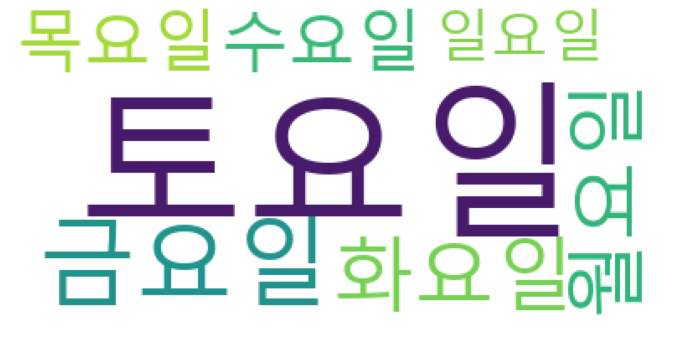

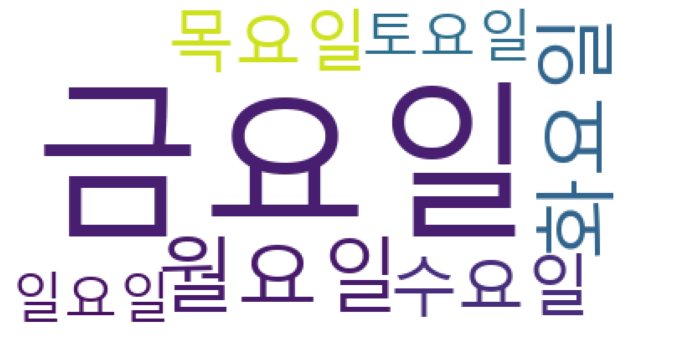

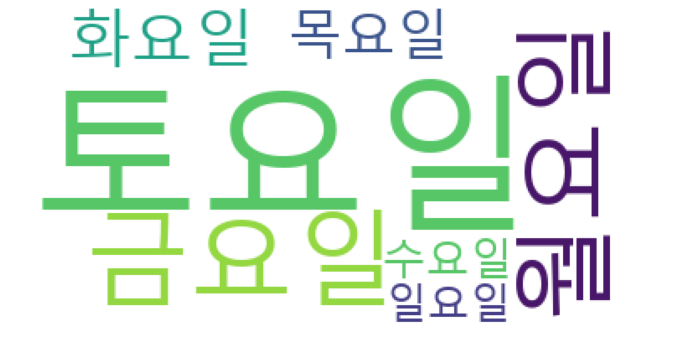

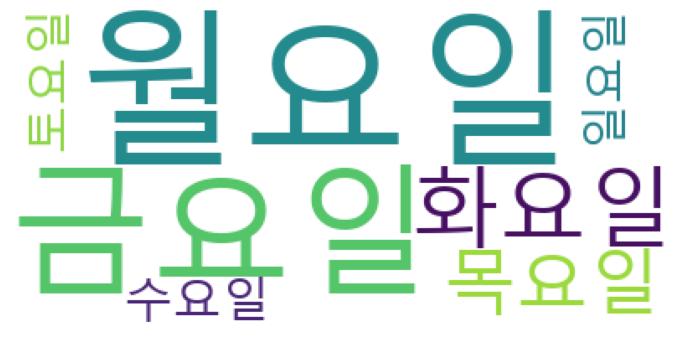

In [92]:
for name in wordlist:
    wordcloud = WordCloud(font_path='../data/malgun.ttf',
                          relative_scaling = 0.2,
                          background_color='white',
                          max_font_size = 100
                          ).generate_from_frequencies(dict(name))
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [93]:
def category_age(data,age,startday1,endday1,startday2,endday2,cal):
  df_age = data[data["연령대"] == age]
  df_age_2019 = df_age[(df_age['소비일자'] >= startday1) & (df_age['소비일자'] <= endday1)]
  df_age_2020 = df_age[(df_age['소비일자'] >= startday2) & (df_age['소비일자'] <= endday2)]
  df_age_2019_cate = df_age_2019.groupby('소비업종')['소비건수'].agg([cal]).reset_index()
  df_age_2019_cate = df_age_2019_cate.rename({cal : '2019소비건수'},axis='columns')
  df_age_2020_cate = df_age_2020.groupby('소비업종')['소비건수'].agg([cal]).reset_index()
  df_age_2020_cate = df_age_2020_cate.rename({cal : '2020소비건수'},axis='columns')
  df_age_merge = pd.merge(df_age_2019_cate,df_age_2020_cate, on='소비업종' )
  df_age_merge['증감률'] =  [ round((( df_age_merge['2020소비건수'][i] - df_age_merge['2019소비건수'][i] ) / df_age_merge['2019소비건수'][i]) * 100 , 3) for i in range(len(df_age_merge)) ]
  df_age_merge = df_age_merge.loc[:,['소비업종','증감률']]
  return df_age_merge

In [94]:
df_sam_50_dist_ratio = category_age(df_sam,'50대',20200101,20200321,20200322,20200505,'mean')
display(df_sam_50_dist_ratio.iplot(kind='bar' ,y='증감률',x='소비업종',  title = '삼성카드 50대 강도 높은 사회적 거리두기 전/후 증감률',asFigure=True))

df_shin_50_dist_ratio = category_age(df_shin,'50대',20200101,20200321,20200322,20200505,'mean')
display(df_shin_50_dist_ratio.iplot(kind='bar' ,y='증감률',x='소비업종',  title = '신한카드 50대 강도 높은 사회적 거리두기 전/후 증감률',asFigure=True))


In [95]:
df_sam_60_dist_ratio = category_age(df_sam,'60대',20200101,20200321,20200322,20200505,'mean')
display(df_sam_60_dist_ratio.iplot(kind='bar' ,y='증감률',x='소비업종',  title = '삼성카드 60대 강도 높은 사회적 거리두기 전/후 증감률',asFigure=True,color=('#17BECF')))

df_shin_60_dist_ratio = category_age(df_shin,'60대',20200101,20200321,20200322,20200505,'mean')
display(df_shin_60_dist_ratio.iplot(kind='bar' ,y='증감률',x='소비업종',  title = '신한카드 60대 강도 높은 사회적 거리두기 전/후 증감률',asFigure=True,color=('#17BECF')))



In [96]:
df_sam_5060_dist_before = (df_sam.query('연령대 == "50대" | 연령대 == "60대"').query('소비일자 >= 20200101 & 소비일자 <= 20200321'))

df_shin_5060_dist_before = (df_shin.query('연령대 == "50대" | 연령대 == "60대"').query('소비일자 >= 20200101 & 소비일자 <= 20200321'))


In [97]:
df_sam_5060_dist_before = df_sam_5060_dist_before.groupby(['연령대','소비업종'],as_index=False)['소비건수'].agg('sum')
df_sam_50_dist_before = df_sam_5060_dist_before.query('연령대 == "50대"').sort_values(by='소비건수',ascending=False).reset_index(drop=True)
display(df_sam_50_dist_before.iplot(kind='bar' ,y='소비건수',x='소비업종',  title = '삼성카드 50대 강도 높은 사회적 거리두기 전 잘팔린 항목',asFigure=True))
df_sam_60_dist_before = df_sam_5060_dist_before.query('연령대 == "60대"').sort_values(by='소비건수',ascending=False).reset_index(drop=True)
display(df_sam_60_dist_before.iplot(kind='bar' ,y='소비건수',x='소비업종',  title = '삼성카드 60대 강도 높은 사회적 거리두기 전 잘팔린 항목',asFigure=True,color=('#17BECF')))

df_shin_5060_dist_before = df_shin_5060_dist_before.groupby(['연령대','소비업종'],as_index=False)['소비건수'].agg('sum')
df_shin_50_dist_before = df_shin_5060_dist_before.query('연령대 == "50대"').sort_values(by='소비건수',ascending=False).reset_index(drop=True)
display(df_shin_50_dist_before.iplot(kind='bar' ,y='소비건수',x='소비업종',  title = '신한카드 50대 강도 높은 사회적 거리두기 전 잘팔린 항목',asFigure=True))
df_shin_60_dist_before = df_shin_5060_dist_before.query('연령대 == "60대"').sort_values(by='소비건수',ascending=False).reset_index(drop=True)
display(df_shin_60_dist_before.iplot(kind='bar' ,y='소비건수',x='소비업종',  title = '신한카드 60대 강도 높은 사회적 거리두기 전 잘팔린 항목',asFigure=True,color=('#17BECF')))

In [98]:
df_sam_5060_dist_after = (df_sam.query('연령대 == "50대" | 연령대 == "60대"').query('소비일자 >= 20200322 & 소비일자 <= 20200505'))

df_shin_5060_dist_after = (df_shin.query('연령대 == "50대" | 연령대 == "60대"').query('소비일자 >= 20200322 & 소비일자 <= 20200505'))


In [99]:
df_sam_5060_dist_after = df_sam_5060_dist_after.groupby(['연령대','소비업종'],as_index=False)['소비건수'].agg('sum')
df_sam_50_dist_after = df_sam_5060_dist_after.query('연령대 == "50대"').sort_values(by='소비건수',ascending=False).reset_index(drop=True)
display(df_sam_50_dist_after.iplot(kind='bar' ,y='소비건수',x='소비업종',  title = '삼성카드 50대 강도 높은 사회적 거리두기 후 잘팔린 항목',asFigure=True))
df_sam_60_dist_after = df_sam_5060_dist_after.query('연령대 == "60대"').sort_values(by='소비건수',ascending=False).reset_index(drop=True)
display(df_sam_60_dist_after.iplot(kind='bar' ,y='소비건수',x='소비업종',  title = '삼성카드 60대 강도 높은 사회적 거리두기 후 잘팔린 항목',asFigure=True,color=('#17BECF')))


df_shin_5060_dist_after = df_shin_5060_dist_after.groupby(['연령대','소비업종'],as_index=False)['소비건수'].agg('sum')
df_shin_50_dist_after = df_shin_5060_dist_after.query('연령대 == "50대"').sort_values(by='소비건수',ascending=False).reset_index(drop=True)
display(df_shin_50_dist_after.iplot(kind='bar' ,y='소비건수',x='소비업종',  title = '신한카드 50대 강도 높은 사회적 거리두기 후 잘팔린 항목',asFigure=True))
df_shin_60_dist_after = df_shin_5060_dist_after.query('연령대 == "60대"').sort_values(by='소비건수',ascending=False).reset_index(drop=True)
display(df_shin_60_dist_after.iplot(kind='bar' ,y='소비건수',x='소비업종',  title = '신한카드 60대 강도 높은 사회적 거리두기 후 잘팔린 항목',asFigure=True,color=('#17BECF')))

In [100]:
df_sam_5060_2019 = (df_sam.query('연령대 == "50대" | 연령대 == "60대"').query('소비일자 <= 20191231'))
df_shin_5060_2019 = (df_shin.query('연령대 == "50대" | 연령대 == "60대"').query('소비일자 <= 20191231'))



In [101]:
df_sam_5060_2019_top = df_sam_5060_2019.groupby(['연령대','소비업종'],as_index=False)[['소비건수']].sum().sort_values(by='소비건수',ascending=False)
df_sam_5060_2019_top = df_sam_5060_2019_top.pivot('소비업종','연령대','소비건수')
df_sam_5060_2019_top = df_sam_5060_2019_top.sort_values(by='50대',ascending=False)
display(df_sam_5060_2019_top.iplot(kind='bar',title = '삼성카드 5060 2019년 잘팔린 카테고리',asFigure=True))

df_shin_5060_2019_top = df_shin_5060_2019.groupby(['연령대','소비업종'],as_index=False)[['소비건수']].sum().sort_values(by='소비건수',ascending=False)
df_shin_5060_2019_top = df_shin_5060_2019_top.pivot('소비업종','연령대','소비건수')
df_shin_5060_2019_top = df_shin_5060_2019_top.sort_values(by='50대',ascending=False)
display(df_shin_5060_2019_top.iplot(kind='bar',title = '신한카드 5060 2019년 잘팔린 카테고리',asFigure=True))


In [102]:
df_sam_5060_2019_sum = df_sam_5060_2019.groupby(['구매월','연령대'],as_index=False)[['소비건수']].agg('sum')
df_sam_5060_2019_sum_pivot = df_sam_5060_2019_sum.pivot('구매월','연령대','소비건수')
display(df_sam_5060_2019_sum_pivot.iplot(kind='bar', title = '삼성카드 5060 2019년 구매건수 합',asFigure=True, barmode = 'stack'))

df_shin_5060_2019_sum = df_shin_5060_2019.groupby(['구매월','연령대'],as_index=False)[['소비건수']].agg('sum')
df_shin_5060_2019_sum_pivot = df_shin_5060_2019_sum.pivot('구매월','연령대','소비건수')
display(df_shin_5060_2019_sum_pivot.iplot(kind='bar', title = '신한카드 5060 2019년 구매건수 합',asFigure=True, barmode = 'stack'))



In [103]:
df_sam_5060_2020 = (df_sam.query('연령대 == "50대" | 연령대 == "60대"').query('소비일자 >= 20200101'))
df_sam_5060_2020_top = df_sam_5060_2020.groupby(['연령대','소비업종'],as_index=False)['소비건수'].agg('sum').sort_values(by='소비건수',ascending=False).reset_index(drop=True)
df_sam_5060_2020_top_pivot = df_sam_5060_2020_top.pivot('소비업종','연령대','소비건수').sort_values(by='50대',ascending=False)
display(df_sam_5060_2020_top_pivot.iplot(kind='bar', title = '삼성카드 5060 2020년 구매건수 합',asFigure=True, barmode = 'stack'))


df_shin_5060_2020 = (df_shin.query('연령대 == "50대" | 연령대 == "60대"').query('소비일자 >= 20200101'))
df_shin_5060_2020_top = df_shin_5060_2020.groupby(['연령대','소비업종'],as_index=False)['소비건수'].agg('sum').sort_values(by='소비건수',ascending=False).reset_index(drop=True)
df_shin_5060_2020_top_pivot = df_shin_5060_2020_top.pivot('소비업종','연령대','소비건수').sort_values(by='50대',ascending=False)
display(df_shin_5060_2020_top_pivot.iplot(kind='bar', title = '신한카드 5060 2020년 구매건수 합',asFigure=True, barmode = 'stack'))




In [104]:
df_sam_50_2020_pm = category_age(df_sam,'50대',20190101,20190630,20200101,20200630,'sum').sort_values(by='증감률').reset_index(drop=True)
display(df_sam_50_2020_pm.iplot(kind='bar',x='소비업종',y='증감률',title = '삼성카드 50대 2019년vs2020년 상반기 비교',asFigure=True))

df_sam_60_2020_pm = category_age(df_sam,'60대',20190101,20190630,20200101,20200630,'sum').sort_values(by='증감률').reset_index(drop=True)
display(df_sam_60_2020_pm.iplot(kind='bar',x='소비업종',y='증감률',title = '삼성카드 60대 2019년vs2020년 상반기 비교',asFigure=True))

df_shin_50_2020_pm = category_age(df_shin,'50대',20190101,20190630,20200101,20200630,'sum').sort_values(by='증감률').reset_index(drop=True)
display(df_shin_50_2020_pm.iplot(kind='bar',x='소비업종',y='증감률',title = '신한카드 50대 2019년vs2020년 상반기 비교',asFigure=True))

df_shin_60_2020_pm = category_age(df_shin,'60대',20190101,20190630,20200101,20200630,'sum').sort_values(by='증감률').reset_index(drop=True)
display(df_shin_60_2020_pm.iplot(kind='bar',x='소비업종',y='증감률',title = '신한카드 60대 2019년vs2020년 상반기 비교',asFigure=True))





In [105]:
df_sam_5060_2020_pm = pd.merge(df_sam_50_2020_pm,df_sam_60_2020_pm,on='소비업종')
df_sam_5060_2020_pm.rename({'증감률_x' : '50대','증감률_y': '60대'},axis=1,inplace=True)
df_sam_5060_2020_pm.set_index('소비업종',inplace=True)
display(df_sam_5060_2020_pm.iplot(kind='bar',title = '삼성카드 5060 2019년vs2020년 상반기 비교',asFigure=True))

df_shin_5060_2020_pm = pd.merge(df_shin_50_2020_pm,df_shin_60_2020_pm,on='소비업종')
df_shin_5060_2020_pm.rename({'증감률_x' : '50대','증감률_y': '60대'},axis=1,inplace=True)
df_shin_5060_2020_pm.set_index('소비업종',inplace=True)
display(df_shin_5060_2020_pm.iplot(kind='bar',title = '신한카드 5060 2019년vs2020년 상반기 비교',asFigure=True))



In [106]:
def df_text(df,age):
    df_50_2019_text = (df.query(age).query('소비일자 >= 20190101 & 소비일자 <= 20190630')).loc[:,['소비업종','소비건수']].reset_index(drop=True)
    df_50_2019_text = df_50_2019_text.groupby('소비업종',as_index=False)[['소비건수']].sum()
    df_50_2019_text.rename({'소비건수':'19소비건수'},axis=1,inplace=True)
    df_50_2020_text = (df.query(age).query('소비일자 >= 20200101 & 소비일자 <= 20200630')).loc[:,['소비업종','소비건수']].reset_index(drop=True)
    df_50_2020_text = df_50_2020_text.groupby('소비업종',as_index=False)[['소비건수']].sum()
    df_50_2020_text.rename({'소비건수':'20소비건수'},axis=1,inplace=True)
    df_50_text = pd.merge(df_50_2019_text,df_50_2020_text,on='소비업종')
    return df_50_text


In [107]:
df_sam_50_text = df_text(df_sam,'연령대 == "50대"')
df_sam_60_text = df_text(df_sam,'연령대 == "60대"')
df_shin_50_text = df_text(df_shin,'연령대 == "50대"')
df_shin_60_text = df_text(df_shin,'연령대 == "60대"')
df_sam_text_list = [df_sam_50_text,df_sam_60_text]
df_shin_text_list = [df_shin_50_text,df_shin_60_text]

In [108]:
import plotly.graph_objects as go


for name in df_sam_text_list:
    fig = go.Figure()
    for i in range(len(name)):
        row, col = i//4 , i%4
        fig.add_trace(go.Indicator(
            mode = "number+delta",
            value = name['20소비건수'][i],
            title = name['소비업종'][i],
            delta = {'reference' : name['19소비건수'][i]},
            domain = {'row': row, 'column':col }))

        fig.update_layout(width=1000, height=800,
            grid = {'rows': 4, 'columns': 4, 'pattern': "independent"},
            template = {'data' : {'indicator': [{
                'mode' : "number+delta+gauge"}]
                                 }})
    fig.show()

## 시계열 예측

### 전처리

In [109]:
"""
# 엠코 데이터 불러오기
mco = pd.read_csv('../data//MCO_full_data.csv')
mco.columns = ['구매날짜','카테고리명','고객성별','고객나이','OS유형','구매금액','구매수']

# 데이트 타입 변경 (구매날짜)

mco['구매날짜'] = pd.to_datetime(mco['구매날짜'].astype(str),format='%Y%m%d')

# 데이터 일치 (연령대) (기준 : 삼성카드)

# 1) 고객나이 음수 or 10세 이하 or 100세 이상 행 제거
index_minus = mco[(mco['고객나이']<=10) | (mco['고객나이']>=100) ].index
mco = mco.drop(index_minus)

# 2) 연령대 일치 (20대 ~ 60대이상)
index7890 = mco[ (mco['고객나이']==70) | (mco['고객나이']==80) | (mco['고객나이']==90) ].index
mco.loc[index7890,'고객나이'] = 60

# 3) 전체 연령대 : mco,  5060 연령대 : mco_5060
mco_5060 = mco[ (mco['고객나이']==50) | (mco['고객나이']==60) ]
mco_5060.columns

#mco['고객나이'].value_counts()
#mco['고객나이'].unique()

# 데이터 년도별 그룹화

mco_5060 = mco_5060.set_index('구매날짜')
mco_5060_series = mco_5060.groupby('구매날짜').sum()


# 신한카드 데이터 불러오기

df = pd.read_excel('../sample/Shinhancard.xlsx')

df['카드이용건수(천건)'] = df['카드이용건수(천건)'].apply(pd.to_numeric,errors='coerce')

# 1) 컬럼명 일치
df = df.rename({'일별' : '소비일자','연령대별':'연령대','업종':'소비업종','카드이용건수(천건)':'소비건수'},axis=1)

# 2) 연령대 일치 (20대 ~ 60대이상)
index70 = df[df['연령대']=='70대'].index
df.loc[index70,'연령대'] = "60대"

# 3) 소비업종 : 분류코드 지우고 업종명만 남기기
df['소비업종'] = [df['소비업종'][i].split('_')[1] for i in range(len(df)) ]

df['소비일자2'] = pd.to_datetime(df['소비일자'].astype(str), format='%Y %m %d')

shinhan_5060 = df[ (df['연령대']=='50대') | (df['연령대']=='60대') ]

shinhan_5060 = shinhan_5060.set_index('소비일자2')
shinhan_5060_series = shinhan_5060.groupby('소비일자2').sum()
"""

'\n# 엠코 데이터 불러오기\nmco = pd.read_csv(\'../data//MCO_full_data.csv\')\nmco.columns = [\'구매날짜\',\'카테고리명\',\'고객성별\',\'고객나이\',\'OS유형\',\'구매금액\',\'구매수\']\n\n# 데이트 타입 변경 (구매날짜)\n\nmco[\'구매날짜\'] = pd.to_datetime(mco[\'구매날짜\'].astype(str),format=\'%Y%m%d\')\n\n# 데이터 일치 (연령대) (기준 : 삼성카드)\n\n# 1) 고객나이 음수 or 10세 이하 or 100세 이상 행 제거\nindex_minus = mco[(mco[\'고객나이\']<=10) | (mco[\'고객나이\']>=100) ].index\nmco = mco.drop(index_minus)\n\n# 2) 연령대 일치 (20대 ~ 60대이상)\nindex7890 = mco[ (mco[\'고객나이\']==70) | (mco[\'고객나이\']==80) | (mco[\'고객나이\']==90) ].index\nmco.loc[index7890,\'고객나이\'] = 60\n\n# 3) 전체 연령대 : mco,  5060 연령대 : mco_5060\nmco_5060 = mco[ (mco[\'고객나이\']==50) | (mco[\'고객나이\']==60) ]\nmco_5060.columns\n\n#mco[\'고객나이\'].value_counts()\n#mco[\'고객나이\'].unique()\n\n# 데이터 년도별 그룹화\n\nmco_5060 = mco_5060.set_index(\'구매날짜\')\nmco_5060_series = mco_5060.groupby(\'구매날짜\').sum()\n\n\n# 신한카드 데이터 불러오기\n\ndf = pd.read_excel(\'../sample/Shinhancard.xlsx\')\n\ndf[\'카드이용건수(천건)\'] = df[\'카드이용건수(천건)\'].apply(pd.to_numer

### Prophet 모듈을 이용한 forecast 예측

In [110]:
"""
# Prophet 모듈을 이용한 forecast 예측

### 신한카드 데이터 5060대 구매건수 예측

# 시계열 위한 데이터 처리

# 1) 데이터 유형을 float로 변환
shinhan_5060_count = shinhan_5060_series.loc[:,'소비건수'].astype(np.float)

shinhan_5060_count.plot()
plt.show()

# 2) 나중에 참 값과 비교를 위해 일부 데이터 추출
mco_trunc1 = shinhan_5060_count[:'2019-12-31']
mco_trunc1

# 3) dataframe 형태 및, columns ds와 y로 설정
df1 = pd.DataFrame({'ds' : mco_trunc1.index, 'y' : mco_trunc1.values})
df1.info()

# prophet모듈을 이용한 forecast 예측

from fbprophet import Prophet
import pandas as pd

m = Prophet(changepoint_range=0.8, changepoint_prior_scale=0.01)
m.fit(df1)

# 미래 dataframe 생성
future = m.make_future_dataframe(periods=182)
future.tail()

# 예측
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

# 시각화
fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)

shinhan_5060_count

plt.figure(figsize=(12,6))
plt.plot(shinhan_5060_count.index, shinhan_5060_count.values, label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

y1 = forecast['yhat'] - shinhan_5060_count.values
y2 = pd.DataFrame(y1[365:])

index = forecast['ds'][365:]
y2.index = index
y2.head()

plt.plot(y2)
plt.axhline(y=0, color='r', linewidth=2)
plt.show()

print('2020-01-01 ~ 2020-06-31')
print('예측값 > 실제값 갯수 : ', y2[y2['yhat']>0].count())
print('예측값 < 실제값 갯수 : ', y2[y2['yhat']<0].count())
print('*'*50)
print('*'*50)
print('2020-01-01 ~ 2020-04-30')
y3 = y2.loc[:'2020-04-30']
print('예측값 > 실제값 갯수 : ', y3[y3['yhat']>0].count())
print('예측값 < 실제값 갯수 : ', y3[y3['yhat']<0].count())

### 구매수

# 1) 데이터 유형을 float로 변환
mco_5060_count = mco_5060_series.loc[:,'구매수'].astype(np.float)

mco_5060_count.plot()
plt.show()

# 2) 나중에 참 값과 비교를 위해 일부 데이터 추출
mco_trunc2 = mco_5060_count[:'2019-12-31']
mco_trunc2

# 3) dataframe 형태 및, columns ds와 y로 설정
df2 = pd.DataFrame({'ds' : mco_trunc2.index, 'y' : mco_trunc2.values})
df2.info()

from fbprophet import Prophet
import pandas as pd

m = Prophet()
m.fit(df2)

# 미래 dataframe 생성
future = m.make_future_dataframe(periods=182)
future.tail()

# 예측
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

# 시각화
fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)

plt.figure(figsize=(12,6))
plt.plot(mco_5060_count.index, mco_5060_count.values, label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

y1 = forecast['yhat'] - mco_5060_count.values
y2 = pd.DataFrame(y1[365:])

index = forecast['ds'][365:]
y2.index = index
y2.head()

plt.plot(y2)
plt.axhline(y=0, color='r', linewidth=2)
plt.show()

print('2020-01-01 ~ 2020-06-31')
print('예측값 > 실제값 갯수 : ', y2[y2['yhat']>0].count())
print('예측값 < 실제값 갯수 : ', y2[y2['yhat']<0].count())
print('*'*50)
print('*'*50)
print('2020-01-01 ~ 2020-04-30')
y3 = y2.loc[:'2020-04-30']
print('예측값 > 실제값 갯수 : ', y3[y3['yhat']>0].count())
print('예측값 < 실제값 갯수 : ', y3[y3['yhat']<0].count())
"""

"\n# Prophet 모듈을 이용한 forecast 예측\n\n### 신한카드 데이터 5060대 구매건수 예측\n\n# 시계열 위한 데이터 처리\n\n# 1) 데이터 유형을 float로 변환\nshinhan_5060_count = shinhan_5060_series.loc[:,'소비건수'].astype(np.float)\n\nshinhan_5060_count.plot()\nplt.show()\n\n# 2) 나중에 참 값과 비교를 위해 일부 데이터 추출\nmco_trunc1 = shinhan_5060_count[:'2019-12-31']\nmco_trunc1\n\n# 3) dataframe 형태 및, columns ds와 y로 설정\ndf1 = pd.DataFrame({'ds' : mco_trunc1.index, 'y' : mco_trunc1.values})\ndf1.info()\n\n# prophet모듈을 이용한 forecast 예측\n\nfrom fbprophet import Prophet\nimport pandas as pd\n\nm = Prophet(changepoint_range=0.8, changepoint_prior_scale=0.01)\nm.fit(df1)\n\n# 미래 dataframe 생성\nfuture = m.make_future_dataframe(periods=182)\nfuture.tail()\n\n# 예측\nforecast = m.predict(future)\nforecast[['ds','yhat','yhat_lower','yhat_upper']].tail()\n\n# 시각화\nfig1 = m.plot(forecast)\n\nfig2 = m.plot_components(forecast)\n\nshinhan_5060_count\n\nplt.figure(figsize=(12,6))\nplt.plot(shinhan_5060_count.index, shinhan_5060_count.values, label='real')\nplt.plot(fo

In [111]:
# 저희는 시계열 분석을 prophet 라이브러리를 사용하고 있습니다. 저희쪽 환경에서는 정상적으로 작동을 하지만 
# 현재 대회측에서 제공해주시는 jupyter 환경에서는 c++ compile의 부재로 인해 해당 라이브러리가 작동되지 않는 것 같습니다. 
# 그래서 해당 코드를 주석처리하고 html로 실제로 라이브러리를 사용하여 나온 결과를 첨부하겠습니다. 
# 감사합니다.